# Experiments with data 

In [2]:
#imports
import numpy as np
import mne
import matplotlib.pyplot as plt
from mne import preprocessing

In [2]:
path = r'../data/raw/S01.set'
eeglab_raw = mne.io.read_raw_eeglab(path)
print(eeglab_raw.info)
print(eeglab_raw.get_data(units='uV').shape)
print(eeglab_raw.ch_names)



Reading c:\Users\Filip\Desktop\bachelor-thesis\notebooks\..\data\raw\S01.fdt
<Info | 8 non-empty values
 bads: []
 ch_names: O1, O2, T5, P3, Pz, P4, T6, T3, C3, Cz, C4, T4, F7, F3, Fz, F4, ...
 chs: 21 EEG
 custom_ref_applied: False
 dig: 21 items (21 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 21
 projs: []
 sfreq: 256.0 Hz
>
(21, 662412)
['O1', 'O2', 'T5', 'P3', 'Pz', 'P4', 'T6', 'T3', 'C3', 'Cz', 'C4', 'T4', 'F7', 'F3', 'Fz', 'F4', 'F8', 'Fp1', 'Fp2', 'EOG', 'Diode']


In [15]:
eventstarts = mne.events_from_annotations(eeglab_raw.copy())[0]


Used Annotations descriptions: ['Experiment', 'Experiment_END', 'Trial_3', 'Trial_3_END', 'Trial_4', 'Trial_4_END']


In [72]:
x = eventstarts[np.where(eventstarts[:,2] == 1)]
y = eventstarts[np.where(eventstarts[:,2] == 2)]
X = x[:,0]
Y = y[:,0]
z = np.concatenate([X, Y])


In [76]:
print(X[:2])
print(Y[0])
print(z[:2])

[104208 104835]
104576
[104208 104835]


In [78]:
np.reshape(z,(2,810))

array([[104208, 104835, 105339, ..., 616177, 616450, 616732],
       [104576, 105075, 105536, ..., 616187, 616455, 617859]])

In [ ]:
print(len(eeglab_raw.annotations))
print(set(eeglab_raw.annotations.duration))
print(set(eeglab_raw.annotations.description))
print(eeglab_raw.annotations.onset[0])

79

In [7]:
path = r'../data/binary/S01.npy'
test = np.load(path)
test.shape

(19, 810, 256)

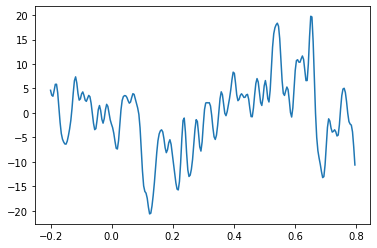

[  4.62372953   3.62309088   3.40609803   4.55047048   5.84818622
   5.85854512   4.10913677   1.1460899   -1.94540744  -4.19169531
  -5.36452406  -5.94862977  -6.3443648   -6.37420999  -5.74627691
  -4.60324501  -3.238477    -1.51648714   0.95679492   4.01708129
   6.581161     7.37153172   6.10812654   3.95269217   2.61735699
   2.86301106   3.88578819   4.28921279   3.59091706   2.6004287
   2.36118892   2.97419003   3.58155378   3.31129247   1.97580918
  -0.04153573  -2.11394994  -3.42487972  -3.1982832   -1.42918783
   0.68314178   1.51266287   0.488379    -1.2948382   -2.09450574
  -1.15805771   0.65031855   1.75818351   1.34908033  -0.06192476
  -1.41702955  -2.26443542  -2.99711564  -4.16970957  -5.80810498
  -7.22857592  -7.3759418   -5.6229266   -2.49690487   0.59209412
   2.54515718   3.33346468   3.54001507   3.50458649   3.15248007
   2.49393578   1.99228247   2.22506223   3.14798695   3.93226924
   3.78948617   2.83714395   1.82394363   1.01889412  -0.29284933
  -3.065478

In [15]:
import matplotlib.pyplot as plt
t = np.arange(-0.2,0.8,1/256.0)
vect = test[1,4,:]
plt.plot(t, vect)
plt.show()


In [16]:
from scipy.signal import spectrogram

f, t, Sxx = spectrogram(vect, fs=256.0)

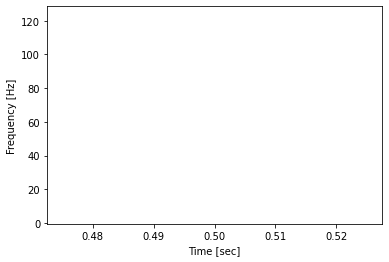

In [17]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

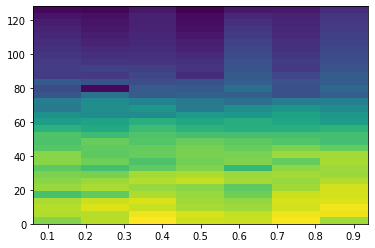

In [24]:
nfft = 64
x,y,z,img = plt.specgram(vect, NFFT=nfft, Fs=256, noverlap=nfft/2)


c:\Users\Filip\Desktop\bachelor-thesis\venv\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


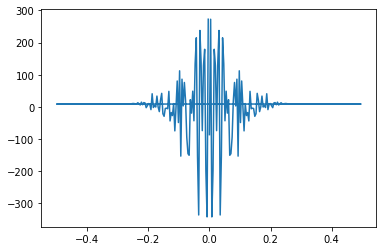

In [9]:
f_vect = np.fft.fft(vect)
freq = np.fft.fftfreq(t.shape[-1])

plt.plot(freq, f_vect)
plt.show()